<a href="https://colab.research.google.com/github/alon182005-alt/practicas/blob/main/Multicapa/Prediccion_de_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
pip install ucimlrepo #permite acceder fácilmente a los conjuntos de datos del repositorio UCI Machine Learning Repository


In [42]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [43]:
X.head() #mostramos el conjunto x


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [44]:
y.head() #mostramos en conjunto y


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [45]:
X.info() #cuantas variabes nulas tiene el conjunto X


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [46]:
y.info() #cuantas variabes nulas tiene el conjunto y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [47]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [48]:
df.info() #cuantas variabes nulas tiene el conjunto



<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [49]:
X = df.drop('mpg', axis=1) #nuevamente debemos definir los conjuntos X e Y
y = df['mpg']


In [50]:
from sklearn.model_selection import train_test_split #Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [51]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [52]:
from sklearn.preprocessing import StandardScaler #Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:
import tensorflow as tf #Definir el modelo de red neuronal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
from tensorflow.keras.optimizers import Adam #Crear un optimizador Adam con una tasa de aprendizaje del 0.001

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [55]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],     #Se compila el modelo utilizando el optimizador Adam y la función de pérdida error cuadrático medio  (mean_squared_error) .
)


In [56]:
history = model.fit( # se entrena el modelo
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 392.3944 - root_mean_squared_error: 19.5362 - val_loss: 26.0466 - val_root_mean_squared_error: 5.1036
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13.8204 - root_mean_squared_error: 3.7143 - val_loss: 16.6801 - val_root_mean_squared_error: 4.0841
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 12.3718 - root_mean_squared_error: 3.4983 - val_loss: 12.5974 - val_root_mean_squared_error: 3.5493
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.7931 - root_mean_squared_error: 2.7748 - val_loss: 13.9117 - val_root_mean_squared_error: 3.7298
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.3114 - root_mean_squared_error: 2.8784 - val_loss: 13.5487 - val_root_mean_squared_error: 3.6809


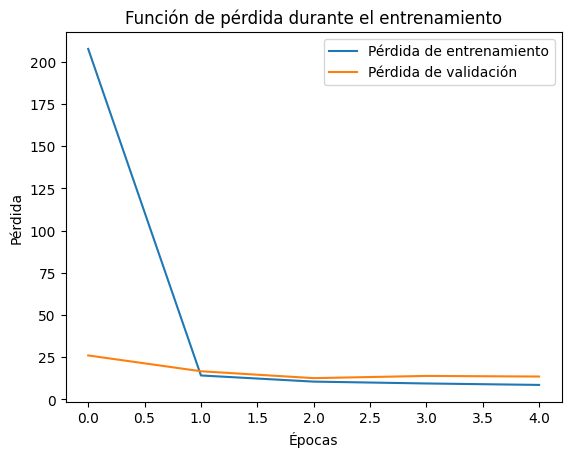

In [57]:
import matplotlib.pyplot as plt #Gráficando la funcion de pérdida

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [58]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1) #Evaluar el modelo en el conjunto de prueba
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.0769 - root_mean_squared_error: 3.6127 
Test Mean Absolute Error: 3.68


In [59]:
predictions = model.predict(X_test) #Hacer predicciones y comparar las predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
     Actual  Predicted
82     23.0  22.017359
167    29.0  27.184273
356    32.4  32.584740
120    19.0  17.219250
385    38.0  36.766548


In [60]:
# otras metricas
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8045547872982682
MSE: 13.548706836363607
